<a href="https://colab.research.google.com/github/na2027/CE888/blob/main/Lab_6__Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 7: To complete this task, please create a new notebook in Google Colab.**

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:


S.No	Categories

1	under-developing country

2	developing country

3	developed country

Note: please justify your reason, why and how you have concluded your answer.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [ ]:
#loading the data set
data_dict= pd.read_csv("data-dictionary.csv")

In [ ]:
data_dict.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [ ]:
#loading the data set
country_df = pd.read_csv("Country-data.csv")

In [ ]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
#display the statistics of the data
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
#let's check the missing value
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

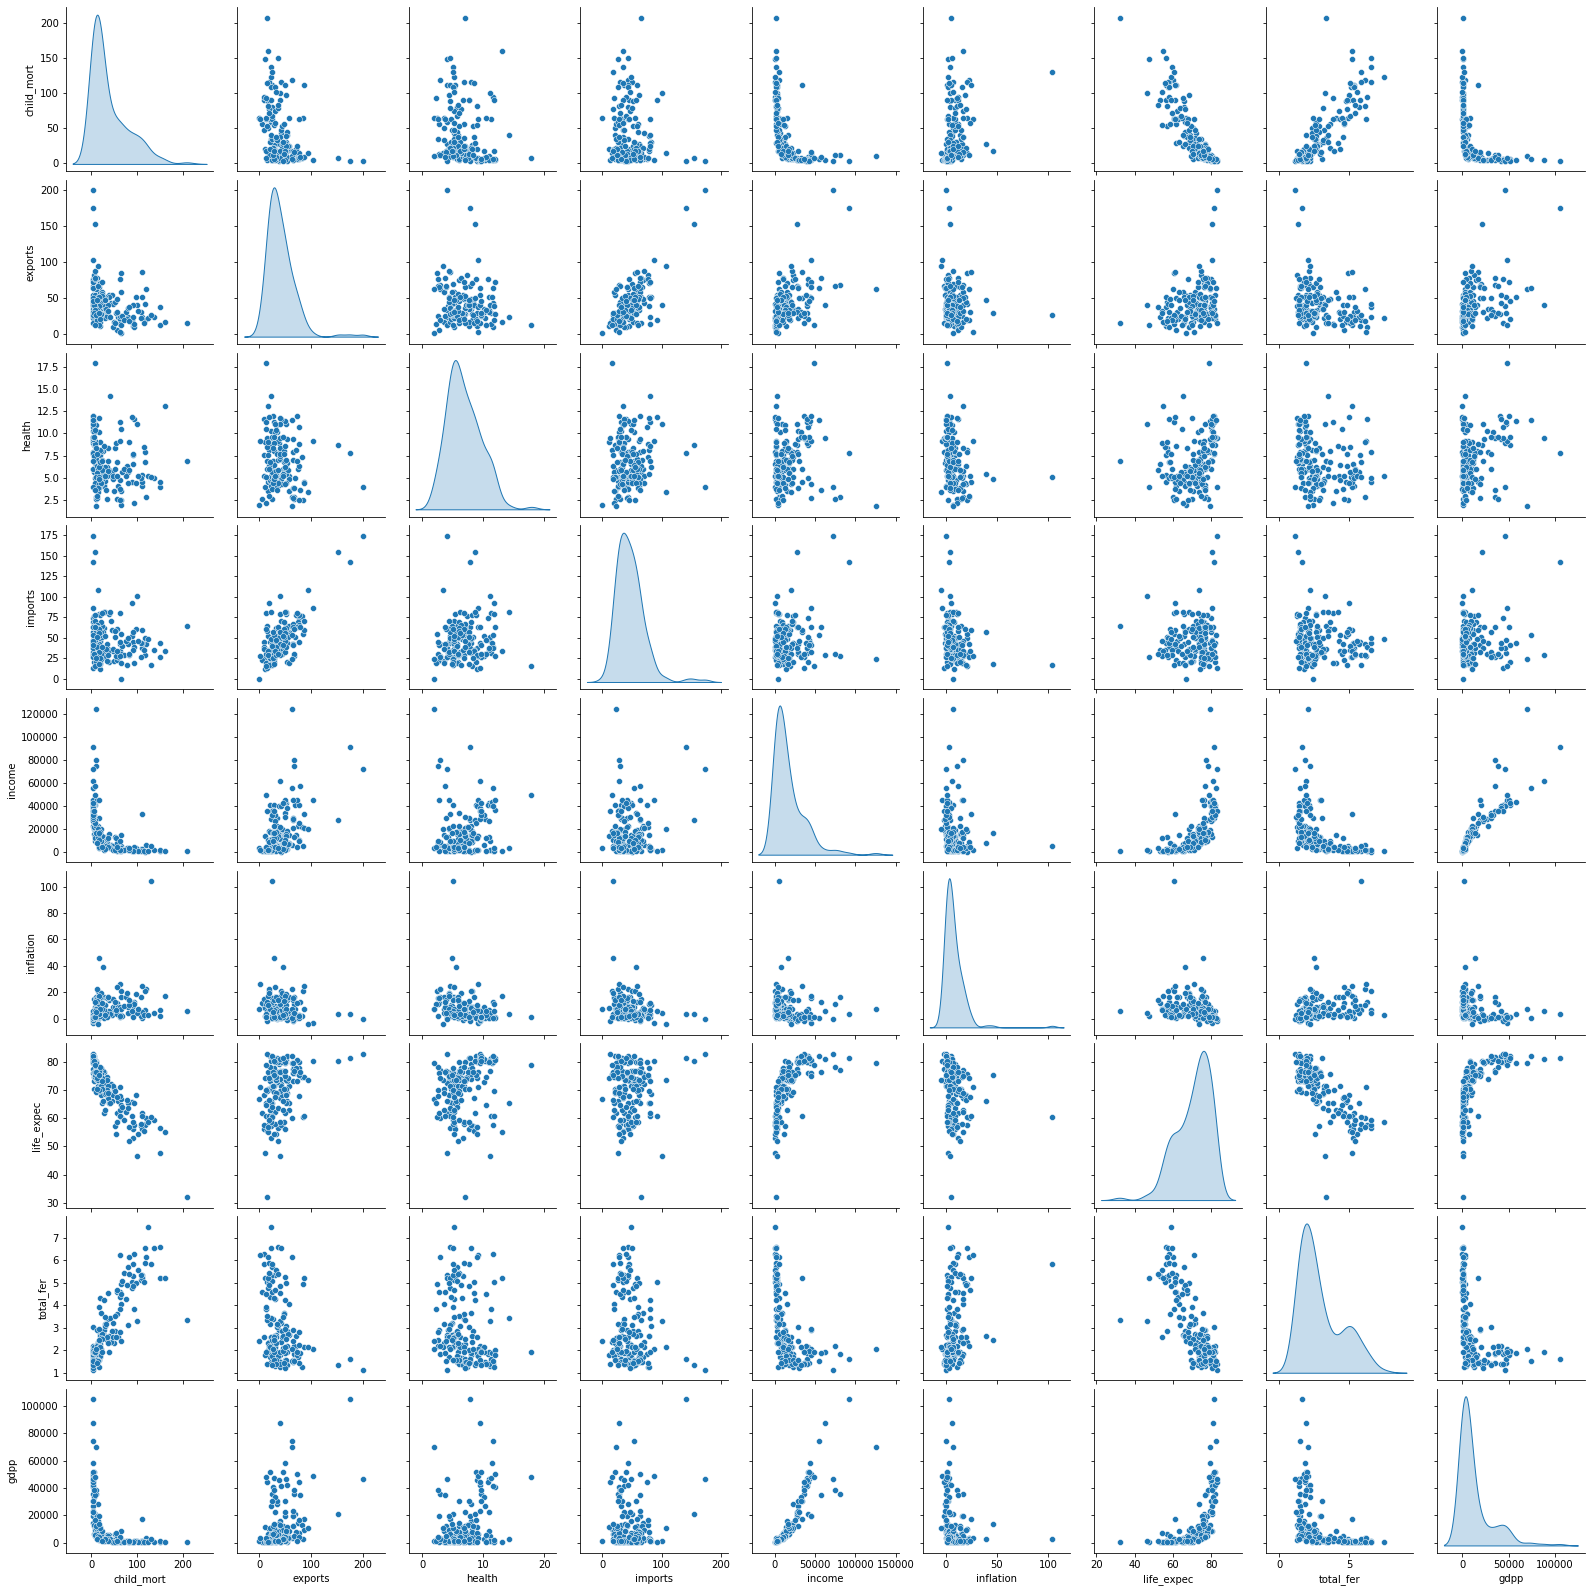

In [ ]:
#let's display the pairwise plotting for each feature.
pair_plot = sns.pairplot(country_df,diag_kind='kde')

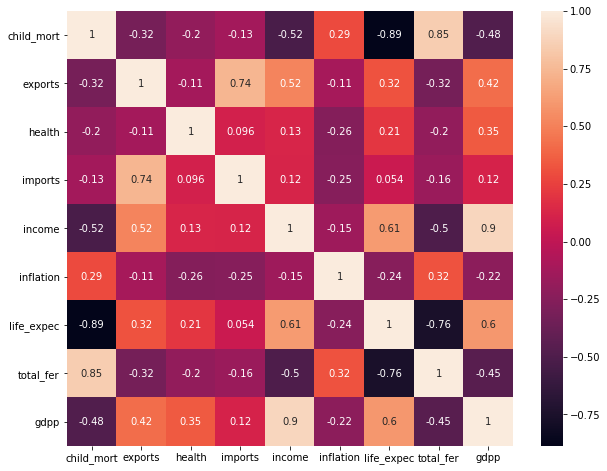

In [ ]:
#Let's check the correlation fo the given dataset using heatmap
plt.figure(figsize=(10,8))
sns.heatmap(country_df.corr(),annot=True)
plt.show()

In the above heatmap we can see there is a strong postive correlation between some of the features, like child mortality and fertility and imports and exports. At the same time, there is a strong negative correlation between life expectancy and child mortality and between life expectancy and fertility. In this, life expectancy has a positive correlation with the income and GDPP.

In [ ]:
#let's handle the normalisation of the data and will set country as index column
country_data_norm = country_df.set_index('country') 

In [ ]:
country_data_norm = country_data_norm.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)))

In [ ]:
country_data_norm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.775558e-17,-3.924422e-17,-2.379999e-16,4.645319e-17,-1.662011e-17,-1.869762e-18,6.082958e-17,6.648042e-18,7.645248e-18
std,1.963434e-01,1.371348e-01,1.707171e-01,1.391883e-01,1.549796e-01,9.768694e-02,1.754077e-01,2.387772e-01,1.749440e-01
min,-1.736614e-01,-2.051117e-01,-3.111056e-01,-2.692072e-01,-1.329332e-01,-1.108200e-01,-7.584948e-01,-2.835905e-01,-1.215355e-01
25%,-1.461541e-01,-8.659207e-02,-1.178178e-01,-9.595712e-02,-1.108576e-01,-5.518743e-02,-1.036625e-01,-1.818555e-01,-1.110458e-01
50%,-9.235667e-02,-3.056154e-02,-3.080725e-02,-2.064124e-02,-5.775891e-02,-2.210362e-02,5.018366e-02,-8.485238e-02,-7.926157e-02
75%,1.160172e-01,5.123304e-02,1.108957e-01,6.818551e-02,4.546399e-02,2.742970e-02,1.231620e-01,1.470088e-01,1.036418e-02
max,8.263386e-01,7.948883e-01,6.888944e-01,7.307928e-01,8.670668e-01,8.891800e-01,2.415052e-01,7.164095e-01,8.784645e-01


**PCA - Principal Component Analysis**

Let's apply the PCA first on scaled data and use that data for train. In the given dataset we have export and import feature which is not important because it does not contribute in development of country. so we will remvoe them




In [ ]:
#Remove imports and exports from data
country_data = country_data_norm.drop(columns=['imports','exports'])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(country_data)
country_data_pca = pca.transform(country_data)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

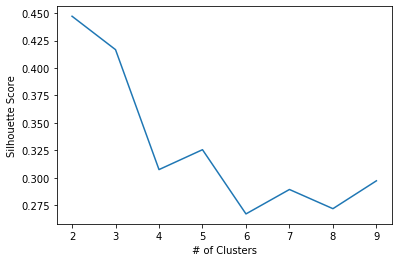

In [ ]:
k_values = []
scores = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(country_data_pca)
    k_values.append(k)
    scores.append(silhouette_score(country_data_pca,kmeans.labels_))
    
ax = plt.plot(k_values,scores)
plt.xlabel('# of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(country_data_pca)
country_data_clustered = country_df 
country_data_clustered['cluster'] = kmeans.labels_

In [ ]:
country_data_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


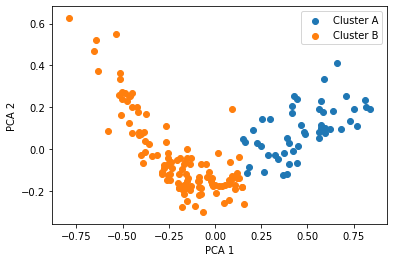

In [ ]:
plt.scatter(country_data_pca[np.where(kmeans.labels_==0)][:,0],country_data_pca[np.where(kmeans.labels_==0)][:,1])
plt.scatter(country_data_pca[np.where(kmeans.labels_==1)][:,0],country_data_pca[np.where(kmeans.labels_==1)][:,1])

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Cluster A', 'Cluster B'])
plt.show()

In [ ]:
country_data_clustered.loc[np.argsort(country_data_pca[:,0])].country

91                   Luxembourg
145                 Switzerland
114                      Norway
123                       Qatar
133                   Singapore
                 ...           
97                         Mali
31     Central African Republic
112                       Niger
32                         Chad
66                        Haiti
Name: country, Length: 167, dtype: object


Now we will split the countries in 3 commonly used categories: 
    
developed

developing 

underdeveloped countries. 



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(country_data_pca)
country_data_clustered = country_df 
country_data_clustered['cluster'] = kmeans.labels_

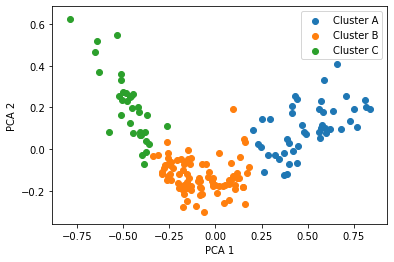

In [ ]:
plt.scatter(country_data_pca[np.where(kmeans.labels_==0)][:,0],country_data_pca[np.where(kmeans.labels_==0)][:,1])
plt.scatter(country_data_pca[np.where(kmeans.labels_==1)][:,0],country_data_pca[np.where(kmeans.labels_==1)][:,1])
plt.scatter(country_data_pca[np.where(kmeans.labels_==2)][:,0],country_data_pca[np.where(kmeans.labels_==2)][:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Cluster A', 'Cluster B', 'Cluster C'])
plt.show()

In the above graph, the green countries are under development and orange or middle countries developing and blue balls are fully developed. We can categorized them with the same name and print some countries name.

In [ ]:
#let's display the top 20 countries by categorizing them as Developing, Developed and Under Developed.
country_data_clustered.replace({0:'Developing',1:'Developed',2:'Underdeveloped'}).head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Developing
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developed
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developed
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Developing
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developed
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developed
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developed
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Underdeveloped
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Underdeveloped
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developed
